# Assignment 3: SQL and Simple Linear Regression

**Collaborators**: Andrick Mercado

In [15]:
import pandas as pd
import sqlite3 as sql
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy

## Scoring Breakdown

|Question|Points|
|---|---|
|1|10|
|2|10|
|3|20|
|4|20|
|5|20|
|6|10|
|7|10|
|**Total**|100|

## Part 1: SQL

**Q1**. Wite a sql query to list all tables in the chinook SQLite sample database.

You can find the database diagram and more information on the database [here](https://www.sqlitetutorial.net/sqlite-sample-database/).

In [2]:
try:
    conn = sql.connect('chinook.db')

    sql_query = """SELECT name FROM sqlite_master
        WHERE type='table';"""
 
    cursor = conn.cursor()
    cursor.execute(sql_query)
    print("List of tables\n")
    print(cursor.fetchall())
 
except sql.Error as error:
    print("Failed to execute the above query", error)
     
finally:
    if conn:
        conn.close()
        print("the sql connection is closed")

List of tables

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]
the sql connection is closed


**Q2**. Select all artists whose name starts wih "A" and ends with "e".

In [3]:
try:
    conn = sql.connect('chinook.db')
    
    sql_query = """SELECT name FROM artists
    WHERE name LIKE 'A%e'"""
 
    cursor = conn.cursor()
    cursor.execute(sql_query)
    print("Artists whose name starts with A and ends with e\n")
    print(cursor.fetchall())
 
except sql.Error as error:
    print("Failed to execute the above query", error)
     
finally:
    if conn:
        conn.close()
        print("the sql connection is closed")

Artists whose name starts with A and ends with e

[('Alanis Morissette',), ('Audioslave',), ('Avril Lavigne',), ('Amy Winehouse',)]
the sql connection is closed


**Q3**. Use the track table to generate a plot that shows the average Milliseconds for each genre. The name of the genre must be used as x labels of the resulting plot.

You can use plt.xticks(rotation=90) to rotate the x axis labels.

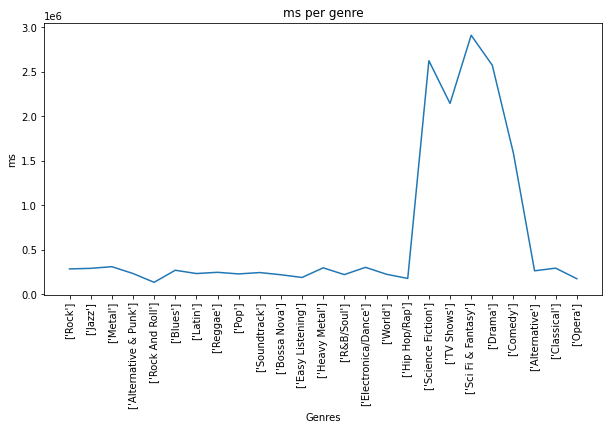

the sql connection is closed


In [4]:
try:
    conn = sql.connect('chinook.db')
    
    sql_query = """SELECT AVG(DISTINCT Milliseconds) FROM tracks GROUP BY GenreId ORDER BY GenreId"""
    cursor = conn.cursor()
    cursor.execute(sql_query)
    MillisecondsDF = pd.DataFrame(cursor.fetchall())
    MillisecondsDF.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
    
    sql_query = """SELECT name FROM Genres"""
    cursor = conn.cursor()
    cursor.execute(sql_query)
    GenresDF = pd.DataFrame(cursor.fetchall())
    GenresDF.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
    
    fig = plt.figure(figsize = (10, 5))
    plt.plot(MillisecondsDF)
    
    x_pos = np.arange(len(MillisecondsDF.index))
    plt.xticks(range(len(MillisecondsDF.index)),GenresDF.values.tolist(), rotation ='vertical')
    plt.title('ms per genre')
    plt.xlabel('Genres')
    plt.ylabel('ms')
    
    plt.show()
    
    
except sql.Error as error:
    print("Failed to execute the above query", error)
     
finally:
    if conn:
        conn.close()
        print("the sql connection is closed")

**Q4**.  List the total number of tracks for each playlist. The Playlist name should also be shown.
 

In [5]:
try:
    conn = sql.connect('chinook.db')
    
    #sql_query = """SELECT COUNT(PlaylistId) FROM playlist_track GROUP BY PlaylistId ORDER BY PlaylistId"""
    
    sql_query = """SELECT p.Name as "Playlist Name", Count(pt.TrackId) as "Number of Tracks" 
    FROM playlists p, playlist_track pt 
    WHERE p.PlayListId == pt.PlayListId 
    GROUP BY p.PLaylistId;"""
    cursor = conn.cursor()
    cursor.execute(sql_query)
    questionfourDF = pd.DataFrame(cursor.fetchall())
    questionfourDF.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
    print(questionfourDF)
 
except sql.Error as error:
    print("Failed to execute the above query", error)
     
finally:
    if conn:
        conn.close()
        print("the sql connection is closed")

                             0     1
0                        Music  3290
1                     TV Shows   213
2                   90’s Music  1477
3                        Music  3290
4                 Music Videos     1
5                     TV Shows   213
6              Brazilian Music    39
7                    Classical    75
8    Classical 101 - Deep Cuts    25
9   Classical 101 - Next Steps    25
10  Classical 101 - The Basics    25
11                      Grunge    15
12         Heavy Metal Classic    26
13                 On-The-Go 1     1
the sql connection is closed


## Part 2: Linear Regression

**Q5**. Create an average graph for the [ocean dataset](https://www.kaggle.com/datasets/sohier/calcofi) to show the relationship between water salinity (Salnty) & water temperature (T_degC)

In [6]:
oceanDF = pd.read_csv("ocean.csv")

x = oceanDF['T_degC']
y = oceanDF['Salnty']

C:\Users\andri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


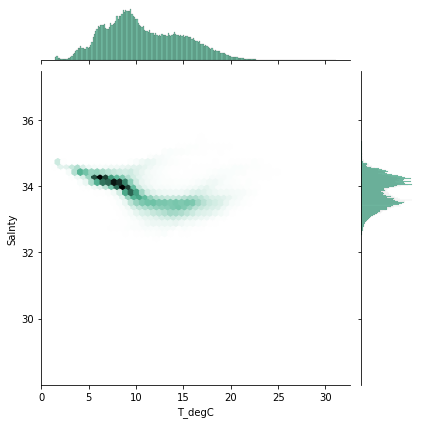

In [7]:
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

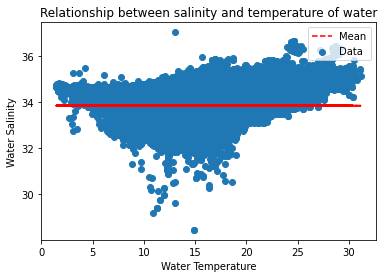

In [8]:
plt.scatter( x, y, label='Data', marker='o')
y_mean = [np.mean(y)]*len(x)
mean_line = plt.plot(x,y_mean, label='Mean', linestyle='--',color="red")

legend = plt.legend(loc='upper right')
plt.title('Relationship between salinity and temperature of water')
plt.xlabel('Water Temperature')
plt.ylabel('Water Salinity')
plt.show()

**Q6.** Create a linear regression line and compare it with the average line you created above.

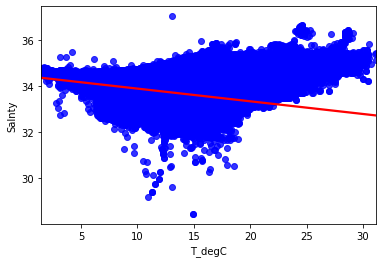

In [9]:
ax = sns.regplot(x=x, y=y,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

**Q7**. How are *pH1* and *pH2* correlated? Measure the strength of correlation. Moreover, describe their correlation in a scatterplot.

In [10]:
x = oceanDF['pH1']
y = oceanDF['pH2']

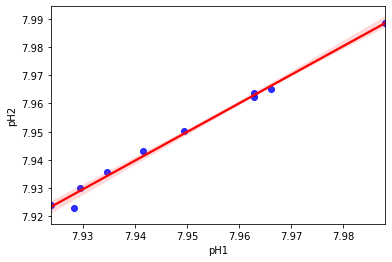

y = 1.01*x + -0.11
R: 1.0
P: 0.0
Std err: 0.0


In [24]:
#plt.scatter( x, y, label='Data', marker='o')
p = sns.regplot(x=x, y=y, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
plt.show()
print('y = {:.2f}*x + {:.2f}'.format(slope, intercept))
print("R:",r_value)
print("P:",p_value)
print("Std err:",std_err)

## Description:
- Cleary visible from the scatterplot is a strong positive corrolation, in other words the corrolation betweeb pH1 and pH2 is positive linear